In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_X_df, get_y_df, data_prep
from model_arch import build_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-08-20 22:36:27.487293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 22:36:27.517834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 22:36:27.518670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 22:36:28.162473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"

In [4]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

61.29107942973524

In [5]:
X = get_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [6]:
model = build_model()
print('Input shape:', X_train[0].shape)

Input shape: (11,)


2023-08-20 22:36:29.527998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-20 22:36:29.528501: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2
)

Epoch 1/375
11/11 [==============================] - 1s 11ms/step - loss: 6348.9761 - val_loss: 6400.2178
Epoch 2/375
11/11 [==============================] - 0s 2ms/step - loss: 6161.6636 - val_loss: 6310.6748
Epoch 3/375
11/11 [==============================] - 0s 2ms/step - loss: 6003.2188 - val_loss: 6206.0625
Epoch 4/375
11/11 [==============================] - 0s 2ms/step - loss: 5874.2817 - val_loss: 6091.3633
Epoch 5/375
11/11 [==============================] - 0s 2ms/step - loss: 5769.2065 - val_loss: 5965.1094
Epoch 6/375
11/11 [==============================] - 0s 2ms/step - loss: 5653.4067 - val_loss: 5840.7783
Epoch 7/375
11/11 [==============================] - 0s 2ms/step - loss: 5518.1982 - val_loss: 5709.1074
Epoch 8/375
11/11 [==============================] - 0s 2ms/step - loss: 5406.6011 - val_loss: 5576.0024
Epoch 9/375
11/11 [==============================] - 0s 3ms/step - loss: 5309.3970 - val_loss: 5453.6333
Epoch 10/375
11/11 [==============================] - 

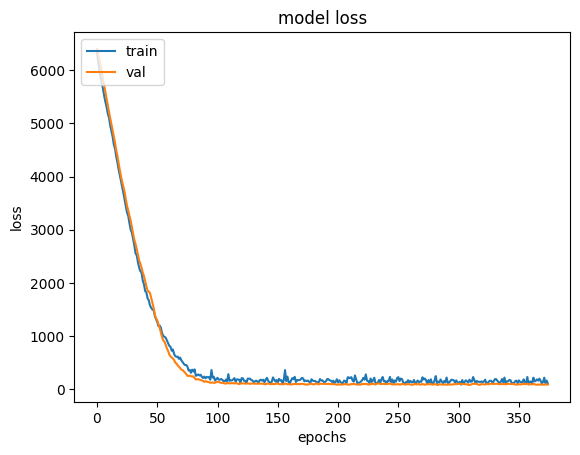

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()